In [27]:
import pandas
import configparser
import psycopg2

In [28]:
config = configparser.ConfigParser()
config.read('config.ini')
host = config['db2']['host']
db = config['db2']['db']
user = config['db2']['user']
pwd = config['db2']['pwd']

In [29]:
conn = psycopg2.connect(host = host, user = user, password = pwd, dbname = db)

In [76]:
cur = conn.cursor()

# Q 3.1

In [31]:
# 3.1 the student table
sql = """select * from student"""

In [32]:
df=pandas.read_sql_query(sql, conn)
df[:10]

/tmp/ipykernel_8339/2024024950.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql, conn)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT


# Q 3.2

In [33]:
# 3.2. Use pandas to display the teachers' names and the corresponding course names jointly.
sql = """select * from p_name_c_name"""

In [93]:
sql = """select professor.p_name, course.c_name from professor
inner join course
on professor.p_email = course.p_email"""

In [94]:
df=pandas.read_sql_query(sql, conn)
df[:10]

/tmp/ipykernel_8339/1904188571.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql, conn)


,p_name,c_name
0,p3,facebook
1,p2,mongodb
2,p3,postgresql
3,p3,twitter
4,p4,linkedin


# Q 3.3

In [68]:
#3.3. Use pandas to create a bar chart showing the number of enrolled students by each course number.
sql = """select c_number, count(*) as num_students
from enroll
group by c_number
order by c_number asc"""

/tmp/ipykernel_8339/910941123.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql, conn)


<Axes: xlabel='c_number'>

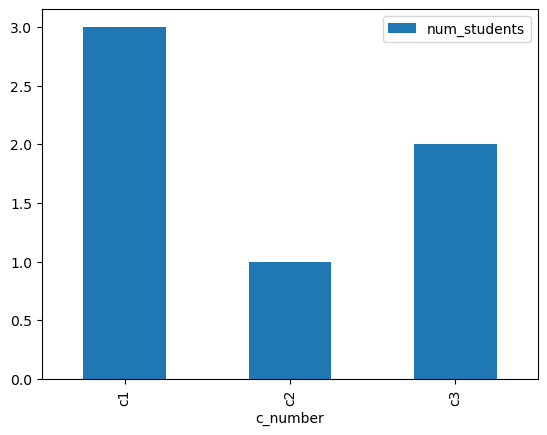

In [70]:
df=pandas.read_sql_query(sql, conn)
df.plot.bar(y='num_students',x='c_number')

# Q 3.4

In [90]:
#3.4. Use pandas to create a bar chart showing the number of courses taught by each professor.
sql = """select p_name_c_name.p_name, count(*) as num_courses
from p_name_c_name
group by p_name_c_name.p_name"""

In [91]:
df=pandas.read_sql_query(sql, conn)
df[:10]

/tmp/ipykernel_8339/1904188571.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql, conn)


,p_name,num_courses
0,p3,3
1,p4,1
2,p2,1


/tmp/ipykernel_8339/3267268412.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql, conn)


<Axes: xlabel='p_name'>

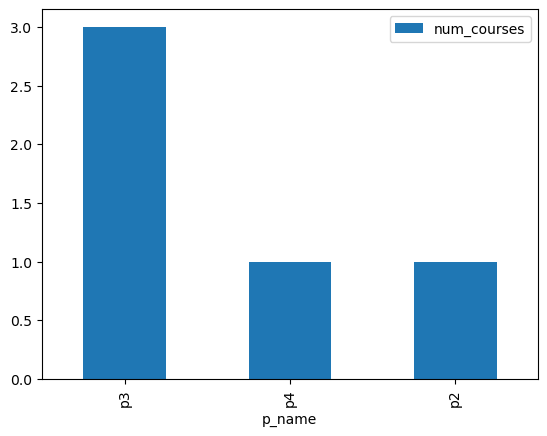

In [92]:
df=pandas.read_sql_query(sql, conn)
df.plot.bar(y='num_courses',x='p_name')

# 3.5

In [25]:
#3.5 A new professor, p4 (p4@jmu.edu, o4), joined JMU and will teach a new course (c5, linkedin, r2). 
#Add a new professor record in the professor table and a new course record in the new course in the course table. 
# Use pandas to display the modified professor table and course table

sql = """insert into professor(p_email,p_name,office)
        values('{}','{}','{}')""".format('p4@jmu.edu','p4','o4')

print(sql)

insert into professor(p_email,p_name,office)
        values('p4@jmu.edu','p4','o4')


In [22]:
conn.commit()

In [37]:
sql = "select * from professor"

In [38]:
df=pandas.read_sql_query(sql,conn)
df[:10]

/tmp/ipykernel_8339/1306982848.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql,conn)


,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4
3,p5@jmu.edu,p5,o5


In [58]:
sql = """insert into course(c_number,c_name,room,p_email)
        values('{}','{}','{}','{}')""".format('c5','linkedin','r2','p4@jmu.edu')

print(sql)

insert into course(c_number,c_name,room,p_email)
        values('c5','linkedin','r2','p4@jmu.edu')


In [104]:
cur.execute(sql)

In [105]:
conn.commit()

In [61]:
sql = "select * from course"

In [62]:
df=pandas.read_sql_query(sql,conn)
df[:10]

/tmp/ipykernel_8339/1306982848.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql,conn)


,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c2,mongodb,r2,p2@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


In [31]:
conn.commit()

In [36]:
sql = """select * from course"""

In [37]:
df=pandas.read_sql_query(sql,conn)
df[:10]

/tmp/ipykernel_31015/1306982848.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql,conn)


,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c2,mongodb,r2,p2@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu


# 3.6

In [110]:
#3.6 p2 will retire, and p4 will teach p2's courses. Delete p2's record in the teacher
##table and change the teacher of p2's class(es) to p4. Use pandas to display the
##modified professor table and course table.

sql = """update course 
set p_email = 'p4@jmu.edu' 
where p_email = 'p2@jmu.edu'"""

In [115]:
cur.execute(sql)

In [116]:
conn.commit(sql)

TypeError: connection.commit() takes no arguments (1 given)

In [114]:
sql = """delete from professor
where p_email = 'p2@jmu.edu';"""

In [117]:
sql = """select * from professor"""

In [118]:
df=pandas.read_sql_query(sql,conn)
df[:10]

/tmp/ipykernel_8339/1306982848.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql,conn)


,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4
2,p5@jmu.edu,p5,o5


In [119]:
sql = """select * from course"""

In [120]:
df=pandas.read_sql_query(sql,conn)
df[:10]

/tmp/ipykernel_8339/1306982848.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pandas.read_sql_query(sql,conn)


,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu
